<a href="https://colab.research.google.com/github/pythonhuo/Modern-Digital-Signal/blob/main/Approaching%20categorical%20variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df = pd.read_csv("winequality-red.csv")

In [3]:
df.head(12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}
df.loc[:, "quality"] = df.quality.map(quality_mapping)

df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,2
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,2
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,4
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,4
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,2


In [5]:
df = df.sample(frac=1).reset_index(drop=True)
df_train = df.head(1000)
df_test = df.tail(599)

In [6]:
# import from scikit-learn
from sklearn import tree
from sklearn import metrics
clf = tree.DecisionTreeClassifier(max_depth=3)
cols = ['fixed acidity',
        'volatile acidity',
        'citric acid',
        'residual sugar',
        'chlorides',
        'free sulfur dioxide',
        'total sulfur dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol']
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=3)

In [8]:
train_predictions = clf.predict(df_train[cols])
test_predictions = clf.predict(df_test[cols])
train_accuracy = metrics.accuracy_score( df_train.quality, train_predictions )
test_accuracy = metrics.accuracy_score( df_test.quality, test_predictions )
print(train_accuracy)
print(test_accuracy)

0.581
0.5759599332220368


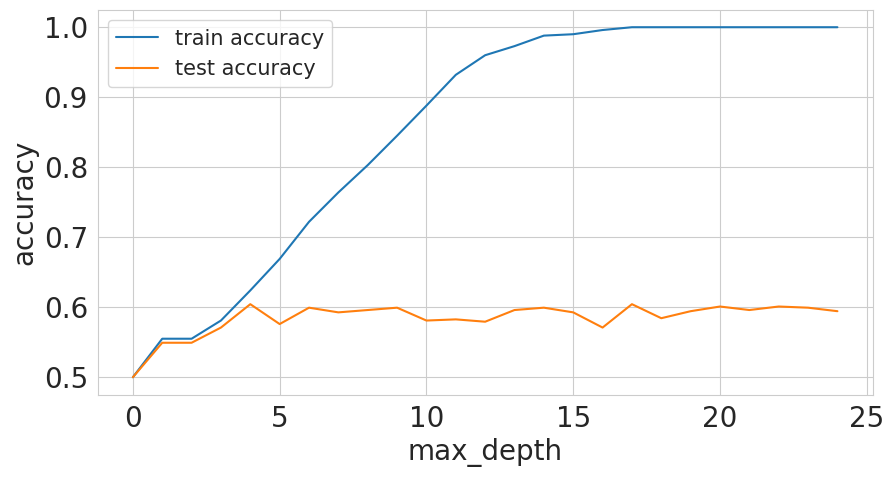

In [9]:
# NOTE: this code is written in a jupyter notebook
# import scikit-learn tree and metrics
from sklearn import tree
from sklearn import metrics
# import matplotlib and seaborn
# for plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# this is our global size of label text
# on the plots
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
# This line ensures that the plot is displayed
# inside the notebook
%matplotlib inline
# initialize lists to store accuracies
# for training and test data
# we start with 50% accuracy
train_accuracies = [0.5]
test_accuracies = [0.5]
# iterate over a few depth values
for depth in range(1, 25):
 # init the model
 clf = tree.DecisionTreeClassifier(max_depth=depth)
 # columns/features for training
 # note that, this can be done outside
 # the loop
 cols = [
 'fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol'
 ]
 # fit the model on given features
 clf.fit(df_train[cols], df_train.quality)
 # create training & test predictions
 train_predictions = clf.predict(df_train[cols])
 test_predictions = clf.predict(df_test[cols])
 # calculate training & test accuracies
 train_accuracy = metrics.accuracy_score(
 df_train.quality, train_predictions
 )
 test_accuracy = metrics.accuracy_score(
 df_test.quality, test_predictions
 )

 # append accuracies
 train_accuracies.append(train_accuracy)
 test_accuracies.append(test_accuracy)
# create two plots using matplotlib
# and seaborn
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

In [18]:
# stratified-kfold for regression
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
def create_folds(data):
 # we create a new column called kfold and fill it with -1
 data["kfold"] = -1

 # the next step is to randomize the rows of the data
 data = data.sample(frac=1).reset_index(drop=True)
 # calculate the number of bins by Sturge's rule
 # I take the floor of the value, you can also
 # just round it
 num_bins = np.int(np.floor(1 + np.log2(len(data))))
 # bin targets
 data.loc[:, "bins"] = pd.cut(data["target"], bins=num_bins, labels=False)

 # initiate the kfold class from model_selection module
 kf = model_selection.StratifiedKFold(n_splits=5)

 # fill the new kfold column
 # note that, instead of targets, we use bins!
 for f, (t_, v_) in enumerate(kf.split(X=data, y=data.bins.values)):
  data.loc[v_, 'kfold'] = f

 # drop the bins column
 data = data.drop("bins", axis=1)
 # return dataframe with folds
 return data
if __name__ == "__main__":
 # we create a sample dataset with 15000 samples
 # and 100 features and 1 target
 X, y = datasets.make_regression(
 n_samples=15000, n_features=100, n_targets=1
 )
 # create a dataframe out of our numpy arrays
 df = pd.DataFrame(
 X,
 columns=[f"f_{i}" for i in range(X.shape[1])]
 )
 df.loc[:, "target"] = y
 # create folds
 df = create_folds(df)


<ipython-input-18-89db2fae027f>:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  num_bins = np.int(np.floor(1 + np.log2(len(data))))


NameError: ignored

In [20]:
# src/train.py
import joblib
import pandas as pd
from sklearn import metrics
from sklearn import tree
def run(fold):
 # read the training data with folds
 df = pd.read_csv("mnist_train_folds.csv")
 # training data is where kfold is not equal to provided fold
 # also, note that we reset the index
 df_train = df[df.kfold != fold].reset_index(drop=True)
 # validation data is where kfold is equal to provided fold
 df_valid = df[df.kfold == fold].reset_index(drop=True)
 # drop the label column from dataframe and convert it to
 # a numpy array by using .values.
 # target is label column in the dataframe
 x_train = df_train.drop("label", axis=1).values
 y_train = df_train.label.values
 # similarly, for validation, we have
 x_valid = df_valid.drop("label", axis=1).values
 y_valid = df_valid.label.values
 # initialize simple decision tree classifier from sklearn
 clf = tree.DecisionTreeClassifier()
 # fir the model on training data
 clf.fit(x_train, y_train)
 # create predictions for validation samples
 preds = clf.predict(x_valid)
 # calculate & print accuracy
 accuracy = metrics.accuracy_score(y_valid, preds)
 print(f"Fold={fold}, Accuracy={accuracy}")
 # save the model
 joblib.dump(clf, f"dt_{fold}.bin")
if __name__ == "__main__":
 run(fold=0)
 run(fold=1)
 run(fold=2)
 run(fold=3)
 run(fold=4)

Fold=0, Accuracy=0.8689166666666667


FileNotFoundError: ignored

In [22]:
# src/train.py
import pandas as pd
import joblib
from sklearn import tree
from sklearn import metrics

def run(fold):
  df = pd.read_csv('mnist_train_folds.csv')
  df_train = df[df.kfold != fold].reset_index(drop=True)
  df_valid = df[df.kfold == fold].reset_index(drop=True)

  x_train = df_train.drop("label", axis=1).values
  y_train = df_train.label.values


  x_valid = df_valid.drop("label", axis=1).values
  y_valid = df_valid.label.values

  clf = tree.DecisionTreeClassifier()

  clf.fit(x_train, y_train)

  preds = clf.predict(x_valid)

  accuracy = metrics.accuracy_score(y_valid, preds)
  print(f"Fold={fold}, Accuracy={accuracy}")

  joblib.dump(clf, f"../dt_{fold}.bin")

if __name__=="__main__":
  run(fold=0)
  run(fold=1)
  run(fold=2)
  run(fold=3)
  run(fold=4)


Fold=0, Accuracy=0.8661666666666666
Fold=1, Accuracy=0.87
Fold=2, Accuracy=0.8683333333333333
Fold=3, Accuracy=0.86975
Fold=4, Accuracy=0.8675


In [3]:
import pandas as pd
df = pd.read_csv("cat_train.csv")
df.head(10)

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0
5,5,0.0,NaN,1.0,T,N,Red,Triangle,Lion,China,...,05afc0f8b,2.0,Expert,Hot,b,Q,wa,3.0,4.0,0
6,6,0.0,0.0,0.0,F,N,Red,Triangle,Hamster,Costa Rica,...,4d3766412,1.0,Grandmaster,Cold,c,R,rg,5.0,6.0,0
7,7,0.0,0.0,1.0,T,N,Red,Triangle,Axolotl,Finland,...,a651dec43,3.0,Expert,Cold,b,Y,PS,1.0,1.0,0
8,8,0.0,0.0,0.0,F,N,Blue,Polygon,Hamster,Russia,...,NaN,1.0,Novice,Boiling Hot,c,N,mX,6.0,3.0,0
9,9,0.0,0.0,NaN,F,Y,Red,Polygon,Hamster,Finland,...,79b29d54c,3.0,Contributor,Lava Hot,n,I,OZ,1.0,8.0,1


In [4]:
mapping = {
  "Freezing": 0,
  "Warm": 1,
  "Cold": 2,
  "Boiling Hot": 3,
  "Hot": 4,
  "Lava Hot": 5
}

In [5]:
df.loc[:, "ord_2"] = df.ord_2.map(mapping)

<ipython-input-5-cfa8674a32f6>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, "ord_2"] = df.ord_2.map(mapping)


In [6]:
df.ord_2.value_counts()


0.0    142726
1.0    124239
2.0     97822
3.0     84790
4.0     67508
5.0     64840
Name: ord_2, dtype: int64

In [10]:
import pandas as pd
from sklearn import preprocessing

# read the data
df = pd.read_csv("cat_train.csv")
# fill NaN values in ord_2 column
df.loc[:, "ord_2"] = df.ord_2.fillna("NONE")
# initialize LabelEncoder
lbl_enc = preprocessing.LabelEncoder()
# fit label encoder and transform values on ord_2 column
# P.S: do not use this directly. fit first, then transform
df.loc[:, "ord_2"] = lbl_enc.fit_transform(df.ord_2.values)
df.ord_2.value_counts()

<ipython-input-10-502d4bbfab21>:12: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, "ord_2"] = lbl_enc.fit_transform(df.ord_2.values)


2    142726
6    124239
1     97822
0     84790
3     67508
4     64840
5     18075
Name: ord_2, dtype: int64

In [11]:
import numpy as np
# create our example feature matrix
example = np.array(
 [
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 1]
 ]
)
# print size in bytes
print(example.nbytes)

72


In [12]:
df.groupby(["ord_2"])["id"].transform("count")

0          67508
1         124239
2         142726
3          64840
4          97822
           ...  
599995    142726
599996     84790
599997    142726
599998    124239
599999     84790
Name: id, Length: 600000, dtype: int64

In [13]:
df.head(10)

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,3,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,6,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,3.0,NaN,2,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,4,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,1,h,C,OZ,5.0,12.0,0
5,5,0.0,NaN,1.0,T,N,Red,Triangle,Lion,China,...,05afc0f8b,2.0,Expert,3,b,Q,wa,3.0,4.0,0
6,6,0.0,0.0,0.0,F,N,Red,Triangle,Hamster,Costa Rica,...,4d3766412,1.0,Grandmaster,1,c,R,rg,5.0,6.0,0
7,7,0.0,0.0,1.0,T,N,Red,Triangle,Axolotl,Finland,...,a651dec43,3.0,Expert,1,b,Y,PS,1.0,1.0,0
8,8,0.0,0.0,0.0,F,N,Blue,Polygon,Hamster,Russia,...,NaN,1.0,Novice,0,c,N,mX,6.0,3.0,0
9,9,0.0,0.0,NaN,F,Y,Red,Polygon,Hamster,Finland,...,79b29d54c,3.0,Contributor,4,n,I,OZ,1.0,8.0,1


In [14]:
df[df.ord_2 == "Boiling Hot"].shape

(0, 25)

In [15]:
df.groupby(
 [
 "ord_1",
 "ord_2"
 ]
 )["id"].count().reset_index(name="count")

,ord_1,ord_2,count
0,Contributor,0,15634
1,Contributor,1,17734
2,Contributor,2,26082
3,Contributor,3,12428
4,Contributor,4,11919
5,Contributor,5,3250
6,Contributor,6,22774
7,Expert,0,19477
8,Expert,1,22956
9,Expert,2,33249


In [17]:
import pandas as pd

from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing

def run(fold):
  df = pd.read_csv("cat_train_folds.csv")

  # 将除了id,kfold和target的列加入特征
  features = [
      f for f in df.columns if f not in ("id", "target", "kfold")
  ]

  # fill NaN
  for col in features:
    df.loc[:,col] = df[col].astype(str).fillna("None")

  df_train = df[df.kfold != fold].reset_index(drop=True)

  df_valid = df[df.kfold == fold].reset_index(drop=True)

  # OneHot encoder
  ohe = preprocessing.OneHotEncoder()

  full_data = pd.concat(
      [df_train[features], df_valid[features]],
      axis=0
  )
  ohe.fit(full_data[features])

  x_train = ohe.transform(df_train[features])

  x_valid = ohe.transform(df_valid[features])

  # 初始化逻辑回归模型
  model = linear_model.LogisticRegression()

  # fit model data
  model.fit(x_train, df_train.target.values)

  valid_preds = model.predict_proba(x_valid)[:,1]

  auc = metrics.roc_auc_score(df_valid.target.values, valid_preds)

  print(auc)

if __name__ == "__main__":
 # run function for fold = 0
 # we can just replace this number and
 # run this for any fold
 run(0)


0.7847864969230733


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [4]:
import pandas as pd

from sklearn import ensemble
from sklearn import metrics
from sklearn import preprocessing

def run(fold):
  df = pd.read_csv("cat_train_folds.csv")

  # 将除了id,kfold和target的列加入特征
  features = [
      f for f in df.columns if f not in ("id", "target", "kfold")
  ]

  # fill NaN
  for col in features:
    df.loc[:,col] = df[col].astype(str).fillna("None")
  #encode features
  for col in features:
    lbl = preprocessing.LabelEncoder()
    # 一般fit都是装数据
    lbl.fit(df[col])

    df.loc[:,col] = lbl.transform(df[col])

  df_train = df[df.kfold != fold].reset_index(drop=True)

  df_valid = df[df.kfold == fold].reset_index(drop=True)

  x_train = df_train[features].values

  x_valid = df_valid[features].values

  # 初始化随机森林
  model = ensemble.RandomForestClassifier(n_jobs=-1)

  model.fit(x_train, df_train.target.values)

  valid_preds = model.predict_proba(x_valid)[:,1]

  auc = metrics.roc_auc_score(df_valid.target.values, valid_preds)

  print(f"Fold = {fold}, AUC = {auc}")


if __name__ == "__main__":
 for fold_ in range(5):
  run(fold_)

Fold = 2, AUC = 0.7159097007196685


<ipython-input-4-3eac8ede2a85>:24: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,col] = lbl.transform(df[col])
<ipython-input-4-3eac8ede2a85>:24: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,col] = lbl.transform(df[col])
<ipython-input-4-3eac8ede2a85>:24: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`


KeyboardInterrupt: ignored